In [64]:
import pandas as pd
import numpy as np
import matplotlib as npl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fn
import seaborn as sns

font_name=fn.FontProperties(fname="C:/WIndows/Fonts/malgun.ttf").get_name()  #한글 꺠짐 패치
plt.rc("font",family=font_name)
npl.rcParams["axes.unicode_minus"]=False
#부록 패키지 설치(학습용)
#pip install mglearn
import mglearn

from sklearn.model_selection import train_test_split

# 선형 회귀(선형 모델)

y = wx1  + wx2  + wx3 + ...... + b (선 - 일차 방정식)
* 초평면을 나누어 볼수 있다.(3차원 이상)

w[0]: 0.393906  b: -0.031804


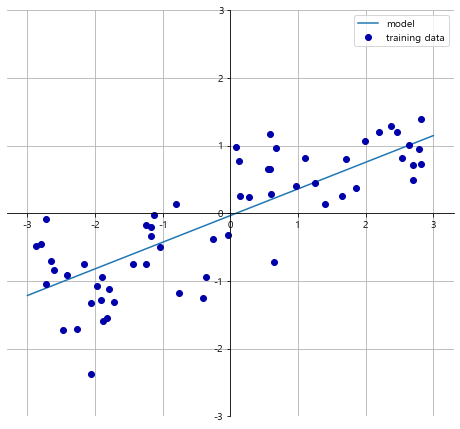

In [65]:
mglearn.plots.plot_linear_regression_wave()

In [66]:
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [67]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
dir(lr)
print("기울기 : {}, 절편 : {}".format(lr.coef_,lr.intercept_))
print("훈련 점수 : ",lr.score(X_train,y_train))
print("Test Score : ",lr.score(X_test,y_test))

기울기 : [0.44153666], 절편 : -0.01711124414733381
훈련 점수 :  0.6592061059587275
Test Score :  0.6932519118518163


---

## 전기 생산량과 소비량(실습)

#### 귀무가설 : 전기 생산량과 소비량은 상관관계가 없다.
#### 대립가설 : 전기 생산량과 소비량은 상관관계가 있다.

In [6]:
# 월별 전기 사용량(백만Kwh)
y=[2.4, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(백만)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

### 생산량이 4일때 사용량은 얼마인가?(예측)

#### 상관관계 분석

In [7]:
from scipy import stats

result = stats.linregress(X,y)
result

LinregressResult(slope=0.5016449069955101, intercept=0.8894428696557766, rvalue=0.8849123724210173, pvalue=0.00013068239860551147, stderr=0.08349414878851996)

In [8]:
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
lr2 = LinearRegression().fit(X,y)
print(lr2.coef_,lr2.intercept_)

[[0.50164491]] [0.88944287]


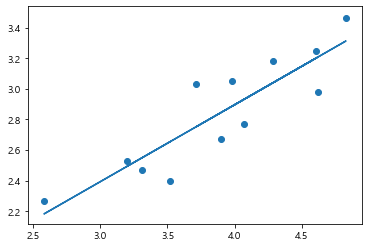

In [9]:
y=[2.4, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(백만)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
slope, intercept, r_value, p_value, stderr = stats.linregress(X,y)

plt.scatter(X,y)
plt.plot(np.array(X),slope*np.array(X)+intercept)

In [10]:
result = slope * 4 + intercept
print("결과 : ",result.round(3),"kwh")

결과 :  2.896 kwh


---

## 고차원 특성에 대한 과대 적합 

In [11]:
X, y = mglearn.datasets.load_extended_boston()
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
lr = LinearRegression().fit(X_train,y_train)

In [13]:
print("Train score : ",lr.score(X_train,y_train))
print("Test score : ",lr.score(X_test,y_test))
# 과대적합으로 해당 모델은 사용할수 없다.
# Train score :  0.9520519609032729
# Test score :  0.6074721959665732

Train score :  0.9520519609032729
Test score :  0.6074721959665743


### 릿지(Ridge) 회귀 모델 - 가장 많이 사용

    - 특징
       * L2 규제(Regularization) - L2 norm 사용
       * MSE항에 패널티항 추가
       * 알파를 크게 하면 패널티의 효과가 커지고(가중치 감소) 작게하면 그 반대가 된다.

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train) # a defult = 1.0
print("Train score : ",ridge.score(X_train,y_train))
print("Test score : ",ridge.score(X_test,y_test))

Train score :  0.885796658517094
Test score :  0.7527683481744748


In [15]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train) # a defult = 10.0
print("Train score : ",ridge10.score(X_train,y_train))
print("Test score : ",ridge.score(X_test,y_test))

Train score :  0.7882787115369614
Test score :  0.7527683481744748


In [16]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train) # a defult = 10.0
print("Train score : ",ridge10.score(X_train,y_train))
print("Test score : ",ridge.score(X_test,y_test))

Train score :  0.7882787115369614
Test score :  0.7527683481744748


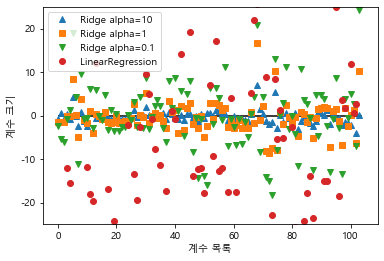

In [17]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

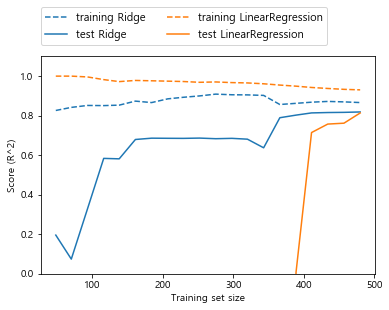

In [18]:
#alpha var 1.0 fix 된 상태에서 데이터의 크기 조절
mglearn.plots.plot_ridge_n_samples()

### 라쏘(Lasso) 회귀 모델

    - 특징
        * L1 규제 사용 - L1 norm 사용
        * alpha 를 크게 하면 패널티의 효과가 커지고 작게하면 그 반대가 된다.(조절이 관건)
        * 특성 선택이 자동으로 이루어진다(특성이 매우 많을때 사용한다)

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)

print("훈련 점수 : ",lasso.score(X_train,y_train))
print("Test Score : ",lasso.score(X_test,y_test))
print("사용한 특성의 수",np.sum(lasso.coef_ !=0)) #-> 과소적합

훈련 점수 :  0.29323768991114607
Test Score :  0.20937503255272294
사용한 특성의 수 4


In [20]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train) # 규제를 풀어줌

print("훈련 점수 : ",lasso001.score(X_train,y_train))
print("Test Score : ",lasso001.score(X_test,y_test))
print("사용한 특성의 수",np.sum(lasso001.coef_ !=0)) #-> 나름 성능이 좋아짐

훈련 점수 :  0.8962226511086497
Test Score :  0.7656571174549982
사용한 특성의 수 33


In [21]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train) # 규제를 풀어줌

print("훈련 점수 : ",lasso00001.score(X_train,y_train))
print("Test Score : ",lasso00001.score(X_test,y_test))
print("사용한 특성의 수",np.sum(lasso00001.coef_ !=0)) #-> overfit

훈련 점수 :  0.9507158754515463
Test Score :  0.643746742127282
사용한 특성의 수 96


### ElasticNet : Ridge + Lasso

#### Boston sample을 이용한 다중 선형 회귀

In [22]:
boston = mglearn.datasets.load_boston()
boston.data.shape
print(boston.feature_names)
print(boston.data)
print(boston.target) #집값
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22

In [23]:
model_boston = LinearRegression().fit(boston.data,boston.target)
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

Text(0.5, 1.0, '집값 예측치와 실제 집값의 관계')

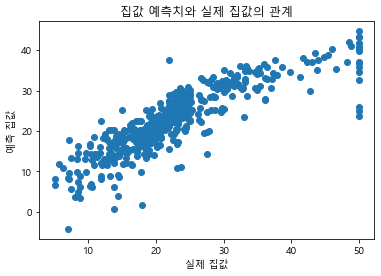

In [24]:
pred = model_boston.predict(boston.data)
plt.scatter(boston.target,pred)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 예측치와 실제 집값의 관계")

C:\Users\kjjs1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


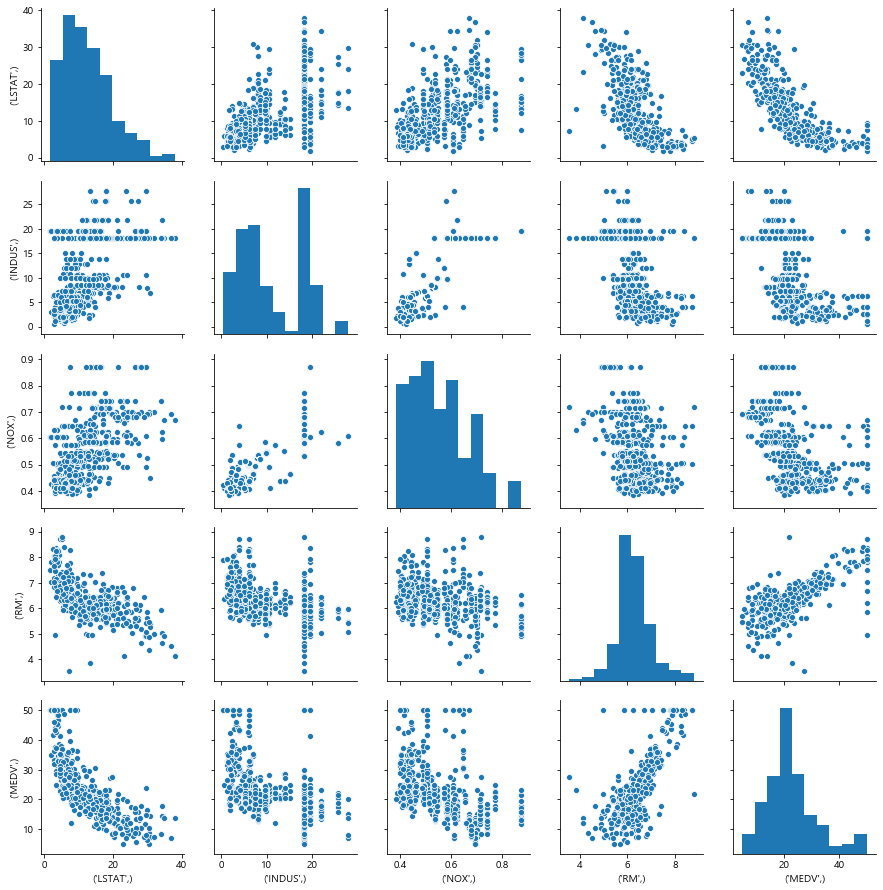

In [25]:
# seaborn 의 pairplot
df = pd.DataFrame(boston.data,columns=[boston.feature_names])
df["MEDV"] = boston.target
df.head(10)

cols=["LSTAT","INDUS","NOX","RM","MEDV"]
sns.pairplot(df[cols],size=2.5)

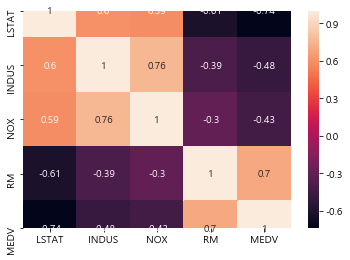

In [45]:
# seaborn 의 heatmap
cc = np.corrcoef(df[cols].values.T)

ax=sns.heatmap(cc,yticklabels=cols,xticklabels=cols,annot=True,annot_kws={'size':10})

In [164]:
#방이 5개일때 집값은 ? 달러인가
X = boston.data
y = boston.target

lr = LinearRegression().fit(X, y)
print(lr.coef_, lr.intercept_)

house_val = lr.predict(5)
print("가격은 : {} 달러 입니다.",house_val)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 36.45948838509001


ValueError: Expected 2D array, got scalar array instead:
array=5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

lr = LinearRegression().fit(X_train, y_train)
print("훈련 점수 : ",lr.score(X_train,y_train))
print("Test Score : ",lr.score(X_test,y_test))

훈련 점수 :  0.712664852202013
Test Score :  0.8171699812170797


In [170]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 점수 : ",ridge.score(X_train,y_train))
print("Test Score : ",ridge.score(X_test,y_test))
np.sum(ridge.coef_)*5+ridge.intercept_

훈련 점수 :  0.712583187065404
Test Score :  0.8176631208519294


-34.3450735592843

In [154]:
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 점수 : ",lasso.score(X_train,y_train))
print("Test Score : ",lasso.score(X_test,y_test))

훈련 점수 :  0.712250243302933
Test Score :  0.8174376830107465


---

## 분류형 선형모델

* 로지스틱 회귀분석
    - 로지스틱 Loss funtion(Cost funtion)

* SVM에서 제공하는 선형모델
    - 교차 엔트로피 loss(Cost) funtion

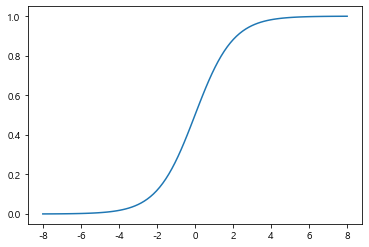

In [171]:
# sigmoid 그래프 그리기

def sigmoid(x):
    result = []
    for i in x:
        result.append(1/(1+np.exp(-i)))
    return result

x= np.linspace(-8,8,100)
sig=sigmoid(x)

plt.plot(x,sig)

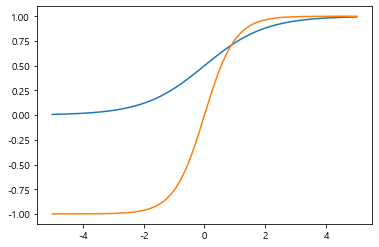

In [175]:
x= np.linspace(-5,5,1000)
plt.plot(x,sigmoid(x))
plt.plot(x,np.tanh(x))

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\kjjs1\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\kjjs1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


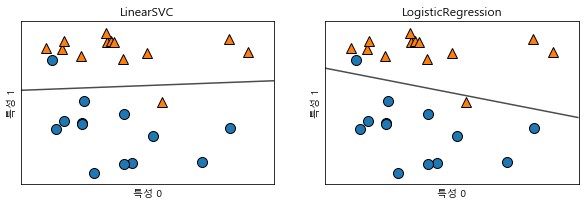

In [177]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

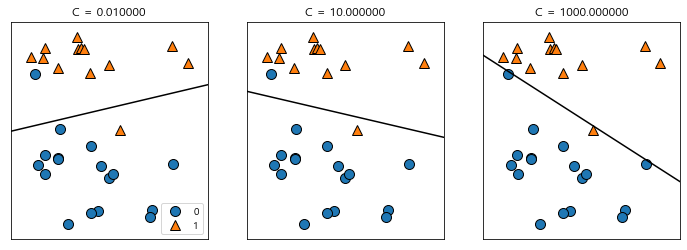

In [178]:
mglearn.plots.plot_linear_svc_regularization()